# This project evaluates Loan Data by creating a Logistic Regression model to determine whether a customer will default on their loan based on their FICO credit score. 
## A Logistic Regression model (Logit) is created on the training dataset and tested on the test dataset.
#### First we will import the necessary libraries

In [820]:
import warnings
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import logit
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from pandas.errors import SettingWithCopyWarning
import sklearn

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

#### Now we will load the dataset into a Pandas dataframe, df

In [822]:
# Read the file loan.csv into a Pandas dataframe, df.
# This line of code can be used if loading locally: df = pd.read_csv('loans.csv')
# The csv file is loaded from my github.
df = pd.read_csv('https://raw.githubusercontent.com/GriffsKode/griffskode.github.io/main/portfolio/logitLoanFICO/loans.csv')
print(df)

      default  installment  log_income  fico_score  rev_balance  inquiries  \
0           0          829        4.93         737        28.85          0   
1           0          228        4.81         707        33.62          0   
2           0          367        4.51         682         3.51          1   
3           0          162        4.93         712        33.67          1   
4           0          103        4.91         667         4.74          0   
...       ...          ...         ...         ...          ...        ...   
9511        1          345        5.29         672       215.37          2   
9512        1          258        4.84         722         0.18          5   
9513        1           98        4.60         687        10.04          8   
9514        1          352        4.70         692         0.00          5   
9515        1          853        4.89         732        37.88          6   

      records  
0           0  
1           0  
2           0  

### The dataset consists of 9,516 rows and 7 columns. The seven columns are: default, installment, log_income, fico_score, rev_balance, inquiries, and records.
### We want the dataframe to only contain whether a customer defaulted (default) and their corresponding FICO score (fico_score).
### The customer default and no_default data will be used to create a logistic regression model.

In [824]:
# The dataframe is set to only include the "default" and "fico_score" columns. 
df = df[["default", "fico_score"]]

#### Now we will examine the head and tail of the dataframe to ensure the dataframe is correct.

In [826]:
print(df.head(6))
print(df.tail(6))

   default  fico_score
0        0         737
1        0         707
2        0         682
3        0         712
4        0         667
5        0         727
      default  fico_score
9510        1         662
9511        1         672
9512        1         722
9513        1         687
9514        1         692
9515        1         732


#### Create a default_df that contains only the customers who defaulted on their loans.
##### These rows are identified by when default == 1

In [828]:
# df.loc[] is used to extract the rows where the loan was defaulted (default == 1). 
# The resulting dataframe is set to default_df and printed.
default_df = df.loc[df['default'] == 1]

print('\nDefault Dataframe :\n', default_df)


Default Dataframe :
       default  fico_score
6           1         667
7           1         722
57          1         682
65          1         687
73          1         677
...       ...         ...
9511        1         672
9512        1         722
9513        1         687
9514        1         692
9515        1         732

[1521 rows x 2 columns]


#### Create a no_default_df that contains only the customers who did not default on their loans.
##### These rows are identified by when default == 0

In [830]:
# df.loc[] is used to extract the rows where the loan was not defaulted (default == 0).
# The resulting dataframe is set to no_default_df and printed.
no_default_df = df.loc[df['default'] == 0]
print('\nNo Default Dataframe :\n', no_default_df)


No Default Dataframe :
       default  fico_score
0           0         737
1           0         707
2           0         682
3           0         712
4           0         667
...       ...         ...
9499        0         722
9500        0         717
9502        0         687
9505        0         687
9506        0         667

[7995 rows x 2 columns]


### Examine the two dataframes with df.describe() to ensure the datasets were created properly.
#### The mean, min, 25%, 50%, 75%, and max values are reviewed to ensure no_default_df is equal to zero and default_df is equal to one.

In [832]:
no_default_df.describe()

,default,fico_score
count,7995.0,7995.000000
mean,0.0,713.307067
std,0.0,38.209948
min,0.0,612.000000
25%,0.0,682.000000
50%,0.0,707.000000
75%,0.0,742.000000
max,0.0,827.000000


In [833]:
default_df.describe()

,default,fico_score
count,1521.0,1521.000000
mean,1.0,697.884287
std,0.0,33.764233
min,1.0,617.000000
25%,1.0,672.000000
50%,1.0,692.000000
75%,1.0,717.000000
max,1.0,822.000000


### Plot the data using Matplotlib to ensure the default and no_default are either equal to zero or one.
#### Plot fico_score vs. default

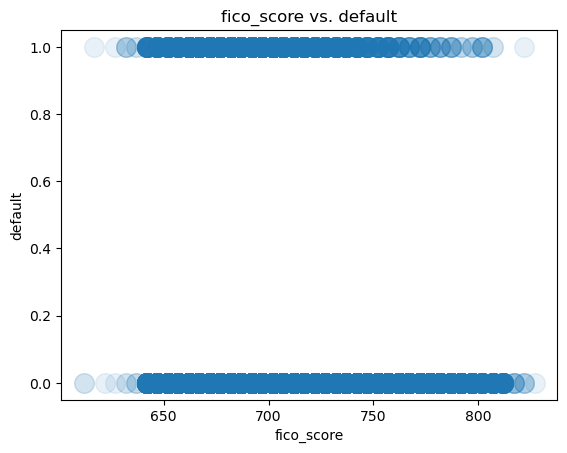

[[737.0 0.0]
 [707.0 0.0]
 [682.0 0.0]
 [712.0 0.0]
 [667.0 0.0]
 [727.0 0.0]
 [667.0 1.0]
 [722.0 1.0]
 [682.0 0.0]
 [707.0 0.0]]


In [835]:
# Plot fico_score versus default
# Matplotlib scatter with fico_score (x) and default (y)
plot = plt.scatter(df['fico_score'], df['default'], alpha=0.1, s=200)
plt.title('fico_score vs. default')
plt.xlabel('fico_score')
plt.ylabel('default')
plt.show()

# points contains 10 of the coordinates in the scatter plot. 
# Each point (x, y) values, correspond to the fico_score (x) and default values (y) in the dataframe, df.
points = plot.get_offsets()
print(points[:10])

### We want to create a logisitic regression model to use the fico_score to determine whether or not someone will default on their loan.
### We will split the dataframe into 70% training data (df_train) and 30% testing data (df_test) using the train_test_split function.
#### The random_state is set to 42. 

In [837]:
# Data split into 70% train and 30% test.
# The dataframes should be called df_train and df_test
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

#### Examine the training dataframe, df_train.

In [839]:
df_train.describe()

,default,fico_score
count,6661.000000,6661.000000
mean,0.159285,710.142171
std,0.365969,37.858862
min,0.000000,612.000000
25%,0.000000,682.000000
50%,0.000000,707.000000
75%,0.000000,737.000000
max,1.000000,822.000000


#### Examine the test dataframe, df_test.

In [841]:
df_test.describe()

,default,fico_score
count,2855.000000,2855.000000
mean,0.161121,712.474606
std,0.367707,38.139235
min,0.000000,612.000000
25%,0.000000,682.000000
50%,0.000000,707.000000
75%,0.000000,737.000000
max,1.000000,827.000000


### Create a Logistic Regression Model using the data

In [843]:
# The logistic regression model formula = target (depedent variable) ~ features (indepedent variables)
formula = "default ~ fico_score"

# Fit the model ("est") to the training data using a logistic regression algorithm (logit).
est = logit(formula=formula, data=df_train).fit()

# Print the model ("est") to examine the Pseudo R-squared, p values, and coefficients
print(est.summary())

Optimization terminated successfully.
         Current function value: 0.426777
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 6661
Model:                          Logit   Df Residuals:                     6659
Method:                           MLE   Df Model:                            1
Date:                Sun, 25 Aug 2024   Pseudo R-squ.:                 0.02670
Time:                        15:27:45   Log-Likelihood:                -2842.8
converged:                       True   LL-Null:                       -2920.7
Covariance Type:            nonrobust   LLR p-value:                 8.719e-36
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6937      0.697      9.610      0.000       5.329       8.059
fico_score    -0.0119      0.

### The logistic regression model ("est") is tested on the test dataframe (df_test) to observe how the model performs on unseen data.
#### A predicted_probability is calculated to predict how likely a customer is to default on their loan given "default" and "fico_score" test data.

In [845]:
# The model ("est") is used to create a predicted probability ("preds") of default from the df_test dataframe
# The column "predicted_probability" is assigned to the predicted output
preds = est.predict(df_test)
df_test['predicted_probability'] = preds
df_test.head(6)

,default,fico_score,predicted_probability
8379,0,647,0.272798
5955,0,742,0.108390
6681,0,742,0.108390
2737,0,707,0.155494
3529,0,727,0.126820
6383,0,732,0.120397


### A new column, "will default" is created to contain the logistic regression model's prediction of whether a customer will default on their loan on the test dataframe. The predicted probability threshold was set to 25% to predict whether the customer will default or not. The predicted probability threshold can be adjusted to optimize the model.

In [847]:
# The new column "will_default" is created to be able to adjust the threshold and optimize the model. 
# The threshold for the customer default, '1' flag is set to 25%.
# This will assign a "will_default" score of 1 if the predicted_probability is greater than 25%
# If the predicted_probability is less than or equal to 25% then "will_"default" score of 0. 
# If yes assign will_default to 1, otherwise to 0
df_test['will_default'] = np.where(df_test['predicted_probability']>0.25, 1, 0)

print(df_test)

      default  fico_score  predicted_probability  will_default
8379        0         647               0.272798             1
5955        0         742               0.108390             0
6681        0         742               0.108390             0
2737        0         707               0.155494             0
3529        0         727               0.126820             0
...       ...         ...                    ...           ...
4078        1         712               0.147864             0
1128        1         702               0.163441             0
4549        0         732               0.120397             0
6885        0         677               0.208117             0
2208        0         752               0.097448             0

[2855 rows x 4 columns]


### A Confusion Matrix is created to observe the performance of the model on the test dataframe (df_test).
#### The confusion matrix examines predicted vs actual default values (will_default vs default).

In [849]:
# Confusion Matrix ("matrix") containing actual vs predicted values.
# The output is assgined to the "matrix" variable
matrix = sklearn.metrics.confusion_matrix(df_test['default'], df_test['will_default'])
print(matrix)

[[2329   66]
 [ 424   36]]


### Heatmap of the Confusion Matrix: 

Text(0.5, 1.0, 'Confusion Matrix Heatmap')

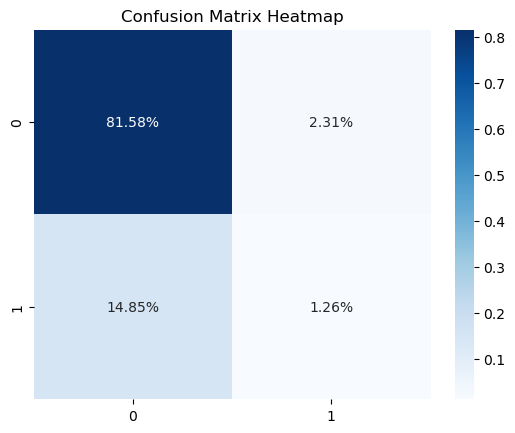

In [851]:
sns.heatmap(matrix/np.sum(matrix), annot=True,
            fmt='.2%', cmap='Blues')
# Add title and labels
plt.title('Confusion Matrix Heatmap')

### Confusion Matrix Heatmap Labeled:

<Axes: title={'center': 'Logistic Regression Model Confusion Matrix'}>

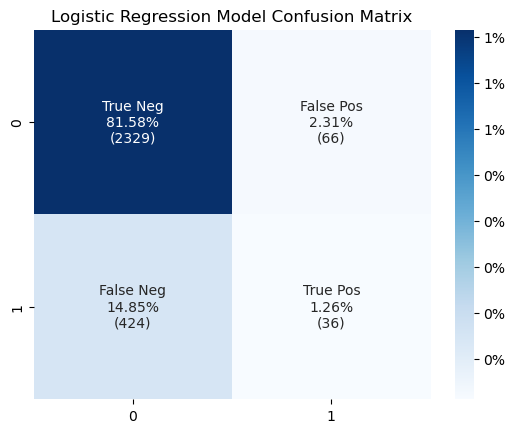

In [853]:
# Calculate the percentages for each quadrant of confusion matrix
percentages = matrix / np.sum(matrix)

# Labels for each confusion matrix quadrant
label_texts = np.array([["True Neg", "False Pos"],
                        ["False Neg", "True Pos"]])

# Labels with percentages, values, and label_texts for the quadrant text label
labels = (np.asarray(["{0}\n{1:.2f}%\n({2:d})".format(text, value*100, int(count)) 
                      for text, value, count in zip(label_texts.flatten(), percentages.flatten(), matrix.flatten())])
          ).reshape(matrix.shape)

# Set the title
plt.title('Logistic Regression Model Confusion Matrix')

# Plot the heatmap
sns.heatmap(percentages, annot=labels, fmt='', cmap='Blues', cbar_kws={'format': '%.0f%%'})

### The Accuracy of the Model is calculated to be:

In [855]:
print('Accuracy:'+str(accuracy_score(df_test['default'], df_test['will_default'])))

Accuracy:0.8283712784588442


### The logistic regression model was determined to have an 82.8% accuracy of predicting whether a customer will default on their loan by using their FICO Credit Score.